## MatLab-style Interface

*Matplotlib* was originally written as a Python alternative for MatLab users, and much of its syntax reflects that fact. The MatLab-style tools are contained in the *pyplot* (**plt**) interface. The *pyplot* interface is a *state-based* interface: that is, Matplotlib keeps track of a *current* axes object and runs commands on that. When a new axes object is created, that new object becomes current.

You've already used the simple *pyplot* interface before (I would assume).

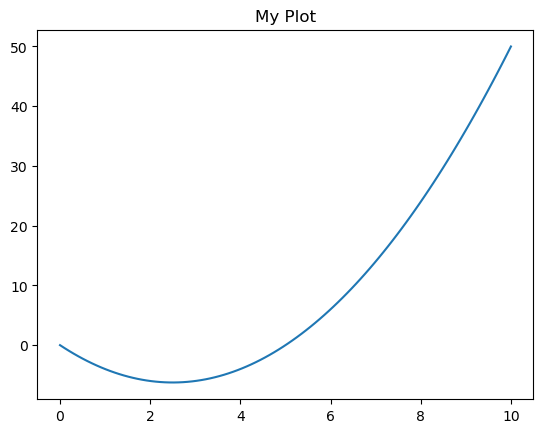

In [5]:
# these are done in my startup file
# import matplotlib.pyplot as plt
# import numpy as np

x = np.linspace(0, 10, 100)
y = x*x - 5*x

plt.plot(x, y)
plt.title('My Plot')
plt.show()

Really easy.

Now consider this example. We'll use a couple methods from the API that are also available in *pyplot*.

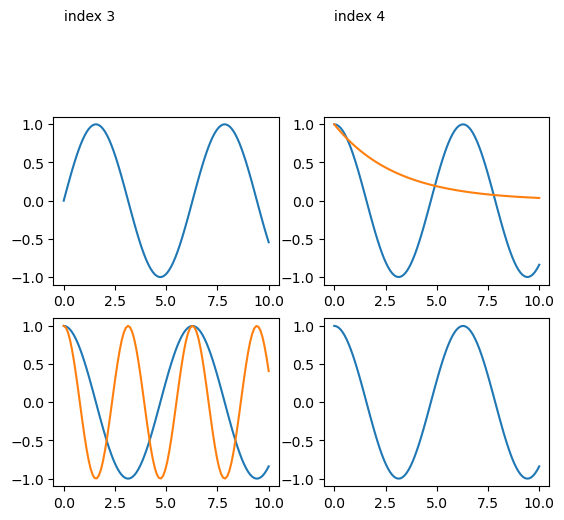

In [26]:
# create the first of 2 panels & set current axis
plt.subplot(2, 2, 1) # (rows, columns, panel number)
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

# create the second panel & set current axis
plt.subplot(2, 2, 2)
plt.plot(x, np.cos(x));
plt.plot(x, np.exp(-x/3))

plt.subplot(2, 2, 3)
plt.plot(x, np.cos(x))
plt.text(0, 5, "index 3")

plt.subplot(2, 2, 4)
plt.plot(x, np.cos(x))
plt.text(0, 5, "index 4")

plt.subplot(2, 2, 3)
plt.plot(x, np.cos(2*x))

plt.show()

The *pyplot* interface is stateful: it keeps track of the “current” axes and figure, which is where
all **plt** commands are applied. You can get a reference to these using the `plt.gca()`
(get current axes) and `plt.gcf()` (get current figure) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? It’s possible within the matlab-style interface, but there is a better way.

---------------------

## Object-Oriented Interface

The *Object-oriented interface* is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an “active” figure or axes, in the object-oriented interface the plotting functions are methods of Figure and Axes objects. To recreate the above plot using this style of plotting, you might do the following:

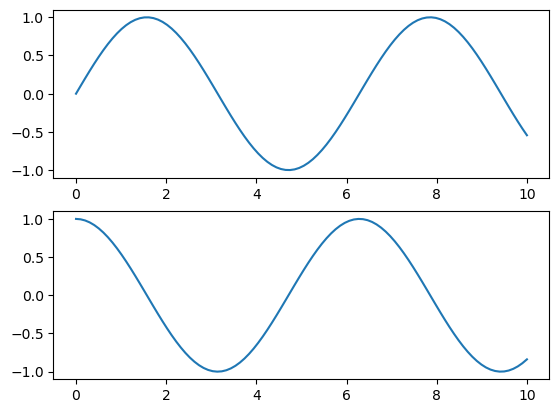

In [33]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

plt.show()

Now, since you have complete access to each part of the plot, you can go back and add somthing to the first `ax[0]` axes.

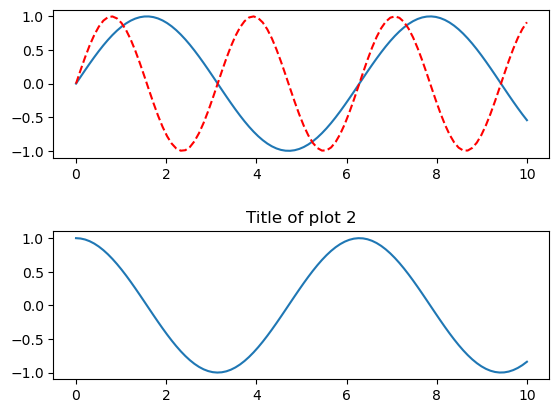

In [37]:
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[1].set_title('Title of plot 2')

# go back and add something
ax[0].plot(x, np.sin(2*x), "r--")

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the value to control the space

plt.show()

Which style to use is largely a matter of taste for more simple plots, but the object oriented approach can become a necessity as plots become more complicated.

We will switch between the pyplot and object-oriented
interfaces, depending on what is most convenient. In most cases, the difference is as
small as switching `plt.plot` to `ax.plot`, but there are a few gotchas that we will highlight
as they come up in the following sections.







------------------------------

### The API


It's useful to understand the high-level *container* classes of Matplotlib, shown in this figure (no pun intended).

![It doesn't matter what you write here](http://matplotlib.org/_images/fig_map.png "Container classes of Matplotlib")

which comes from the [Matplotlib Documentation FAQs](http://matplotlib.org/faq/usage_faq.html#general-concepts)

#### Figure

The whole *figure* (marked as the outer red box). The figure keeps track of all the child Axes, a smattering of ‘special’ artists (titles, figure legends, etc), and the canvas. (Don’t worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of Axes, but to be useful should have at least one.

#### Axes

This is what you think of as "a plot", it is the region of the image with the data space (marked as the inner blue box). A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the `set_xlim()` and `set_ylim()` Axes methods). Each Axes has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`).

The Axes class and it’s member functions are the primary entry point to working with the OO interface.


#### Axis

These are the number-line-like objects (circled in green). They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.


#### Artist

Basically everything you can see on the figure is an *artist* (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.




-----------------------------


### Pyplot

Provides the state-full interface to the underlying object-oriented plotting library. 
It implicitly and automatically creates figures and axes to achieve the desired plot. For example:


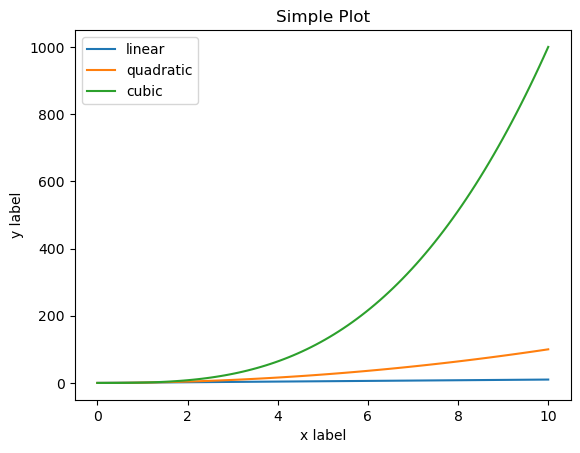

In [38]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

The first call to `plt.plot` will automatically create the necessary figure and axes to achieve the desired plot. Subsequent calls to `plt.plot` re-use the current `axes` and each add another line. Setting the `title, legend`, and `axis` labels also automatically use the current axes and set the title, create the legend, and label the axis, respectively.